## Introduction

#### create a model to classify the raisin based  7 morphological features are extracted from images.

### Import the necessary packages.

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re


### Import train and test dataset

In [71]:
train=pd.read_csv("../input/raisin/Training_DataSet_Raisin - Sheet1.csv")
test=pd.read_csv("../input/raisin/Testing_DataSet_Raisin - Sheet1.csv")

### Change column names in train and test dataset to lowercase.

In [72]:
train=train.rename(columns={col:col.lower()   for col in train.columns.values})
test=test.rename(columns={col:col.lower()  for col in test.columns.values})

### Pre-processing function

In [9]:
 def num_feature_eng(df):
        for col in df.iloc[:,1:8].columns.values:
            df[f"{col}_min"]=df[col].min()
            df[f"{col}_max"]=df[col].max()
            df[f"{col}_median"]=df[col].median()
            df[f"{col}_mean"]=df[col].mean()
        return df

### Apply the pre-processing steps to train dataset

In [73]:
train=num_feature_eng(train)

### Import pycaret model

In [1]:
!pip install imbalanced-learn==0.7.0 -q
!pip install --user pycaret[full] -q
!pip install numba==0.53 -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [28]:
import pycaret
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key                     495 non-null    int64  
 1   area                    495 non-null    int64  
 2   majoraxislength         495 non-null    float64
 3   minoraxislength         495 non-null    float64
 4   eccentricity            495 non-null    float64
 5   convexarea              495 non-null    int64  
 6   extent                  495 non-null    float64
 7   perimeter               495 non-null    float64
 8   class                   495 non-null    object 
 9   area_min                495 non-null    int64  
 10  area_max                495 non-null    int64  
 11  area_median             495 non-null    float64
 12  area_mean               495 non-null    float64
 13  majoraxislength_min     495 non-null    float64
 14  majoraxislength_max     495 non-null    fl

### Create label encoder and apply to target column

In [29]:
target_encoder=LabelEncoder()

In [30]:
train['class']=target_encoder.fit_transform(train['class'])

### Split predictor(X) and response(y) variable

In [33]:
X=train.iloc[:,np.r_[1:8,9:37]]
y=train['class']

### Create a new dataframe with concatenate the selected predictor and response variable.

In [34]:
train1=pd.concat([X,y],axis=1)

### Setup model to train

In [35]:
clf_pycaret = setup(data = train1,
                    data_split_shuffle=True,
                    data_split_stratify=True,
                    fold_strategy='stratifiedkfold',
                    fold_shuffle=True,
                    fold=5,
                    target = 'class', session_id=112,
                    use_gpu =True,
                    silent=True
                   ) 
set_config('seed', 123)

,Description,Value
0,session_id,112
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(495, 36)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare all classifier models then select the top 3 models based on the Accuracy score.

In [36]:
top3 = compare_models(sort = 'Accuracy',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8843,0.9181,0.9129,0.8644,0.8875,0.7686,0.7709,0.2320
catboost,CatBoost Classifier,0.8786,0.9232,0.9015,0.8667,0.8819,0.7572,0.7612,1.9700
gbc,Gradient Boosting Classifier,0.8699,0.9126,0.8842,0.8629,0.8722,0.7398,0.7421,0.1180
et,Extra Trees Classifier,0.8670,0.9078,0.8958,0.8491,0.8710,0.7339,0.7367,1.1920
xgboost,Extreme Gradient Boosting,0.8556,0.9010,0.8899,0.8349,0.8608,0.7111,0.7140,0.1120
ridge,Ridge Classifier,0.8555,0.0000,0.8956,0.8305,0.8605,0.7109,0.7160,0.0160
lightgbm,Light Gradient Boosting Machine,0.8498,0.8995,0.8610,0.8447,0.8514,0.6995,0.7020,0.2840
lda,Linear Discriminant Analysis,0.8497,0.9191,0.8671,0.8386,0.8517,0.6994,0.7015,0.0240
ada,Ada Boost Classifier,0.8496,0.8876,0.8489,0.8514,0.8482,0.6990,0.7023,0.1060
nb,Naive Bayes,0.8381,0.9027,0.9474,0.7788,0.8536,0.6758,0.6965,0.0100


### Blend the top 3 model

In [37]:
blender = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.9127,0.9143,0.8421,0.8767,0.7429,0.7456
1,0.8986,0.9286,0.8857,0.9118,0.8986,0.7971,0.7975
2,0.8841,0.8899,0.9429,0.8462,0.8919,0.7677,0.7729
3,0.8986,0.9387,0.8529,0.9355,0.8923,0.7968,0.7998
4,0.8406,0.9235,0.9118,0.7949,0.8493,0.6818,0.6890
Mean,0.8786,0.9187,0.9015,0.8661,0.8818,0.7572,0.7610
Std,0.0216,0.0166,0.0303,0.0509,0.0177,0.0428,0.0410


### Finalize the belnded model

In [38]:
final = finalize_model(blender)

In [39]:
from sklearn import set_config
set_config(display="diagram")

In [40]:
final

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f360c125610>),
                             ('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         presort='deprecated',
                                                         random_state=112,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=1, verbose=False, voting='soft',
                 weights=None)

### Model ROC curve

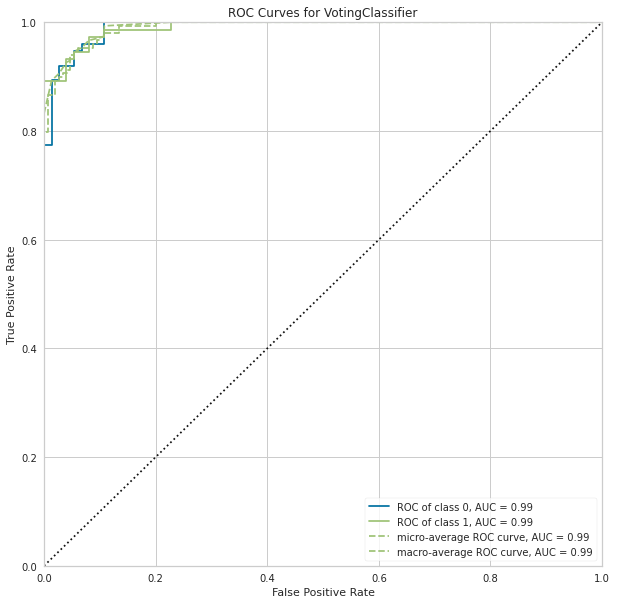

In [41]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'auc')

### Model precision and recall curve

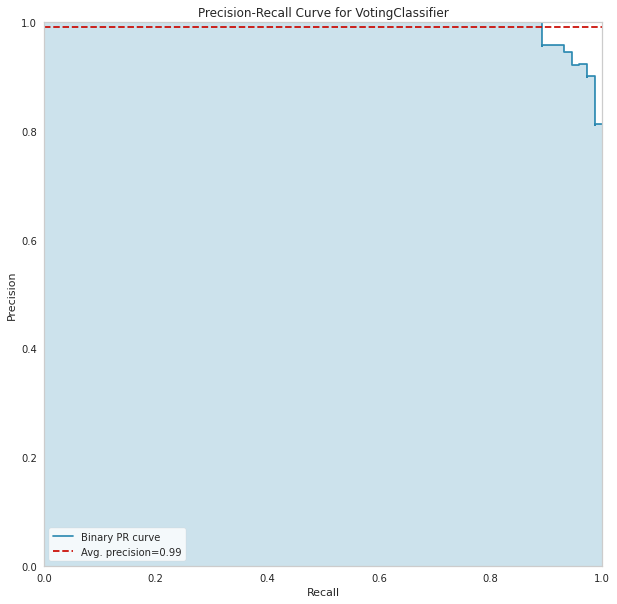

In [42]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'pr')

### Model confusion matrix for hold out data

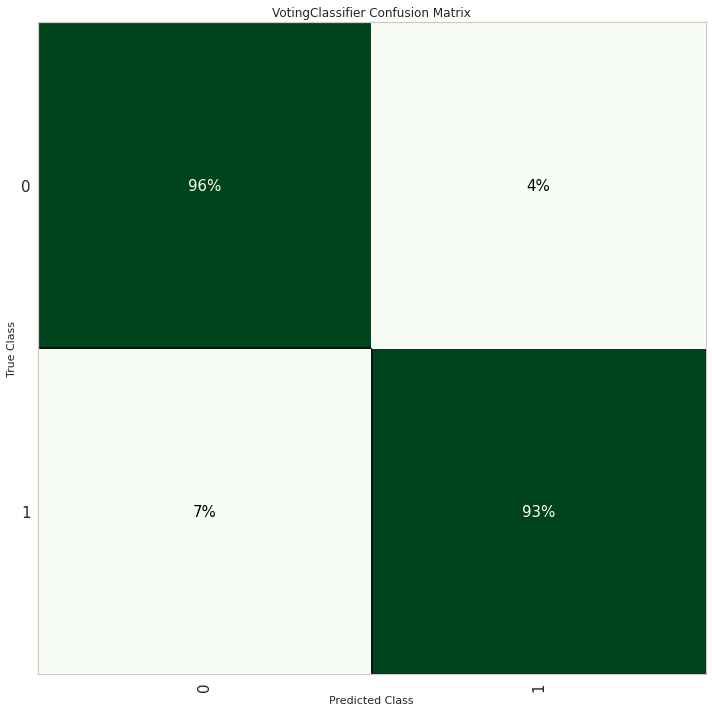

In [43]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'confusion_matrix',use_train_data = False, plot_kwargs = {'percent' : True})

### Error plot

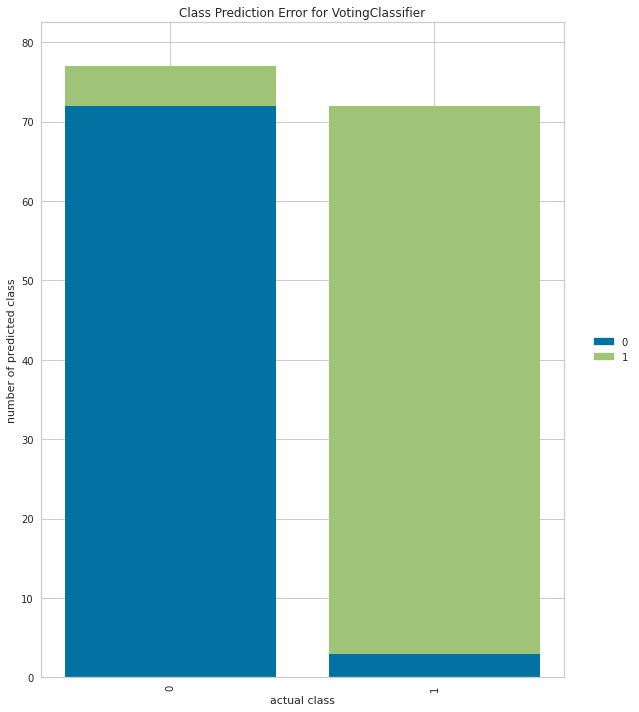

In [44]:
plt.figure(figsize = (10,10))
plot_model(final, plot = 'error')

### Random Forest model feature importance plot

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_mod=RandomForestClassifier()

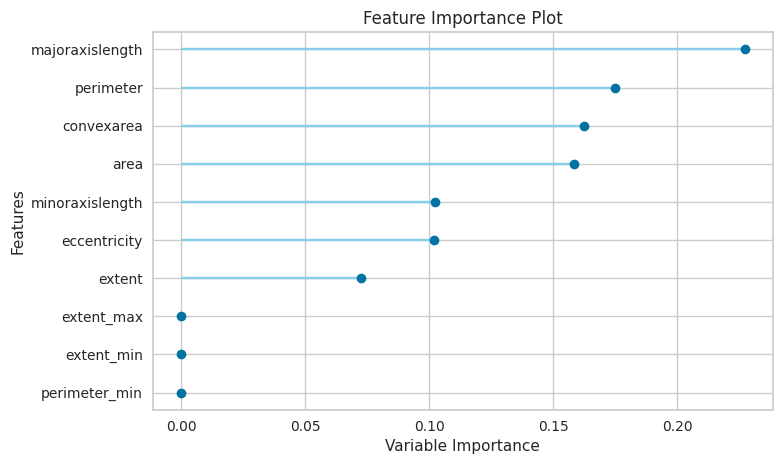

In [56]:
rf_model = create_model(rf_model)
plot_model(rf_model, plot = 'feature')

### Validation curve for catboost model

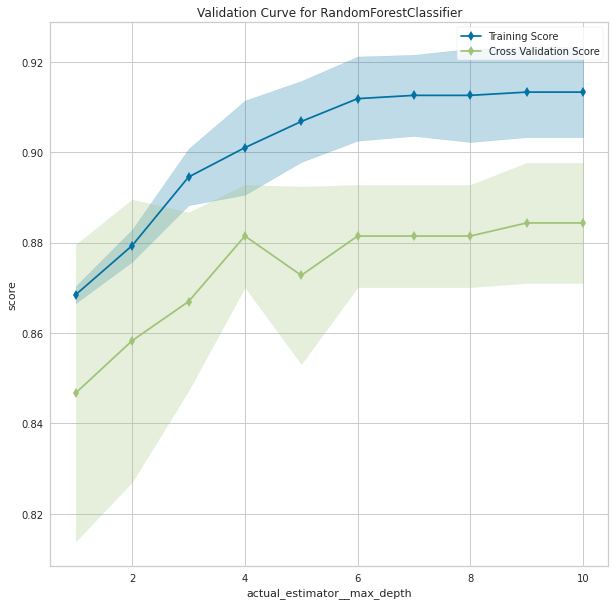

In [58]:
plt.figure(figsize = (10,10))
plot_model(final.named_estimators_[list(final.named_estimators)[0]], plot = 'vc')

### Apply the pre-process steps to test dataset

In [74]:
test=num_feature_eng(test)

### Predict the test data by using finalized blended model

In [75]:
test['Class']=(predict_model(final, data=test.loc[:,X.columns])['Label'])

### Create a result dataframe

In [76]:
res=pd.DataFrame({'Key':test['key'],'Class':test['Class']})

### Apply inverse tranform to the prdicted values

In [77]:
res['Class']=target_encoder.inverse_transform(res['Class'])

### Write the result dataframe to csv

In [78]:
res.to_csv("pycaret_blend_1.csv",index=False)